## Introduction

In this example we load an example bulk, MDA, and MALBAC power spectral densities (PSDs) generated by the command line tool provided in the PaSDqc package. We additionally compare the PaSDqc PSDs to naive PSDs generated using the algorithm of [Leung et al, 2016](http://www.pnas.org/content/113/30/8484.long)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import PaSDqc

%matplotlib inline

Load the PSD data using the PaSDqc API

In [2]:
sample_mda = PaSDqc.PSDTools.SamplePSD.load_from_file("../data/intro_PSDs/example_MDA.spec", name='MDA')
sample_malbac = PaSDqc.PSDTools.SamplePSD.load_from_file("../data/intro_PSDs/example_MALBAC.spec", name='MALBAC')
sample_DOP = PaSDqc.PSDTools.SamplePSD.load_from_file("../data/intro_PSDs/example_PCR.spec", name='MALBAC')
sample_bulk = PaSDqc.PSDTools.SamplePSD.load_from_file("../data/intro_PSDs/example_bulk.spec", name='Bulk')
DOP_bulk = PaSDqc.PSDTools.SamplePSD.load_from_file("../data/intro_PSDs/PCR_bulk.chroms.spec", name='PCR Bulk')

In [3]:
freq = sample_mda.freq
freq2 = sample_DOP.freq
avg_mda = sample_mda.avg_PSD()
avg_bulk = sample_bulk.avg_PSD()
avg_malbac = sample_malbac.avg_PSD()
avg_dop = sample_DOP.avg_PSD()
bulk_dop = DOP_bulk.avg_PSD()

Normalize the single-cell samples using an idealized bulk for MDA and MALBAC and the associated PCR bulk for the DOP-PCR sample

In [4]:
mda_norm = PaSDqc.PSDTools.normalize_psd(avg_mda)
malbac_norm = PaSDqc.PSDTools.normalize_psd(avg_malbac)
dop_norm = PaSDqc.PSDTools.normalize_psd(avg_mda, '../data/intro_PSDs/PCR_bulk.chroms.spec')

Some manipulations of the DOP-PCR sample since it includes more frequencies than the other samples

In [5]:
freq2_cut = freq2[freq2<=5e-3]
avg_sns_cut = avg_dop[freq2<=5e-3]
sns_norm_cut = bulk_dop[freq2<=5e-3]

freq2_small = freq2[freq2>5e-3]
avg_sns_small = avg_dop[freq2>5e-3]
sns_norm_small = bulk_dop[freq2>5e-3]

In [6]:
period = 1 / freq

Load naive spectra from file

In [7]:
df_naive = pd.read_table("../data/intro_PSDs/naive_spectra.txt")

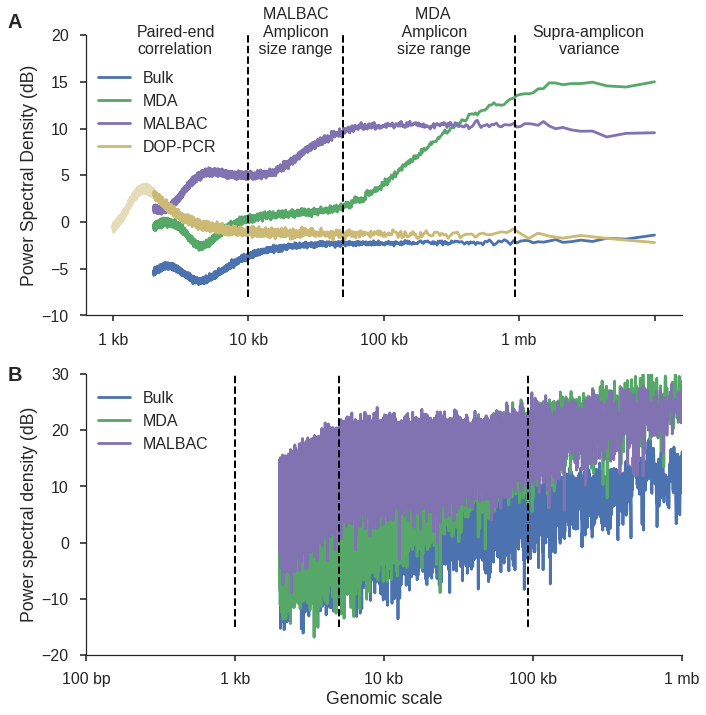

In [8]:
sns.set_context("poster")
sns.set_style("ticks", {'ytick.minor.size': 0.0, 'xtick.minor.size': 0.0})
fig = plt.figure(figsize=(10, 10))
ax0 = plt.subplot(211)
ax1 = plt.subplot(212)
cp = sns.color_palette()

## PaSDqc power spectral density plots
ax0.plot(period, 10*np.log10(avg_bulk), label='Bulk')
ax0.plot(period, mda_norm, label='MDA')
ax0.plot(period, malbac_norm, label='MALBAC', color=cp[3])
ax0.plot(1/freq2_cut, 10*np.log10(avg_sns_cut/sns_norm_cut), label='DOP-PCR', color=cp[4])
ax0.plot(1/freq2_small, 10*np.log10(avg_sns_small/sns_norm_small), color=cp[4], alpha=0.5)

# Vertical lines
ax0.plot((92804, 92804), (-8, 20), 'k--', linewidth=2)
ax0.plot((5e3, 5e3), (-8, 20), 'k--', linewidth=2)
ax0.plot((1e3, 1e3), (-8, 20), 'k--', linewidth=2)
# ax0.plot((92804, 92804), (-10, 50), 'k--', linewidth=2)
# ax0.plot((5e3, 5e3), (-10, 50), 'k--', linewidth=2)
# ax0.plot((1e3, 1e3), (-10, 50), 'k--', linewidth=2)

# Plot adjustments
ax0.set_ylim(-10, 20)
ax0.legend(loc=(0.01, 0.55))
# ax0.set_ylim(-15, 50)
# ax0.legend(loc=(0.01, 0.6))
ax0.set_xscale('log')
ax0.set_xticklabels(["0", "100 bp", "1 kb", "10 kb", "100 kb", "1 mb"])
ax0.set_ylabel("Power Spectral Density (dB)")

# Labels
ax0.text(1.25e5, 18, "Supra-amplicon\n      variance", fontsize=16)
ax0.text(1.25e4, 18, "    MDA\n Amplicon\nsize range", fontsize=16)
ax0.text(1.1e3, 18, "  MALBAC\n  Amplicon\n size range", fontsize=16)
ax0.text(1.5e2, 18, "Paired-end\ncorrelation", fontsize=16)

# Naive PSD plots
ax1.plot(1/df_naive.freq, df_naive.psd_Bulk, label='Bulk')
ax1.plot(1/df_naive.freq, df_naive.psd_MDA, label='MDA')
ax1.plot(1/df_naive.freq, df_naive.psd_MALBAC, label='MALBAC', color=cp[3])

ax1.set_xscale('log')
ax1.set_xlim(1e2, 1e6)
ax1.set_ylim(-20, 35)
ax1.legend(loc=(0.01, 0.7))
ax1.set_xlabel('Genomic scale')
ax1.set_ylabel('Power spectral density (dB)')

ax1.plot((92804, 92804), (-15, 30), 'k--', linewidth=2)
ax1.plot((5e3, 5e3), (-15, 30), 'k--', linewidth=2)
ax1.plot((1e3, 1e3), (-15, 30), 'k--', linewidth=2)
ax1.set_ylim(-20, 30)
ax1.set_xticklabels(["0", "100 bp", "1 kb", "10 kb", "100 kb", "1 mb"])

# Figure Layout
plt.tight_layout()
sns.despine(fig=fig, ax=ax0)
sns.despine(fig=fig, ax=ax1)

fig.text(0.01, 0.98, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)
fig.text(0.01, 0.49, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=20)